In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import pickle

from PatchTST_supervised.utils.metrics import metric, MAE, MAPE

In [2]:
def data_inverse(label_c, original_dimension, original_position, scaler): #original dimensino(2D) without the label_c column
    temp_matrix = np.full(original_dimension, 0, np.float32)
    temp_matrix = np.insert(temp_matrix, original_position, label_c, axis=1)
    return scaler.inverse_transform(temp_matrix)[:, original_position]

In [3]:



scaler_path = r'scaler\sse_index_spec_s\sse_index_spec_s_15_1.pkl'

metrics_path = r'results\sse_index_spec_s_15_1_PatchTST_stock_custom_ftMS_sl15_ll5_pl1_dm64_nh4_el2_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0\metrics.npy'

pred_path = r'results\sse_index_spec_s_15_1_PatchTST_stock_custom_ftMS_sl15_ll5_pl1_dm64_nh4_el2_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0\pred.npy'

true_path = r'results\sse_index_spec_s_15_1_PatchTST_stock_custom_ftMS_sl15_ll5_pl1_dm64_nh4_el2_dl1_df128_fc1_ebtimeF_dtTrue_Exp_0\true.npy'




#load scaler
scaler = None

with open(scaler_path, 'rb') as f:
    scaler = pickle.load(f)


n_column = (scaler.n_features_in_) - 1


metrics = np.load(metrics_path, allow_pickle=True)
print(metrics)

pred_raw = np.load(pred_path)
pred_raw = pred_raw.reshape((pred_raw.shape[0]))
pred = data_inverse(pred_raw, (pred_raw.shape[0], n_column), n_column, scaler)
print(pred_raw[:10])
print(pred[:10])
print(pred.shape)
print(pred_raw.shape)

true_raw = np.load(true_path)
true_raw = true_raw.reshape((true_raw.shape[0]))
true = data_inverse(true_raw, (true_raw.shape[0], n_column), n_column, scaler=scaler)
print(true_raw[:10]) 
print(true[:10])
print(true.shape)
print(true_raw.shape)



[0.022704879 0.001075868 0.03280043 0.04230786 0.005430411 0.13689476
 array([0.20055836], dtype=float32)]
[0.51035535 0.4787367  0.482341   0.47597528 0.48956138 0.47364652
 0.47311142 0.477649   0.47570685 0.48245433]
[2851.4556 2821.4473 2824.868  2818.8264 2831.7207 2816.6165 2816.1086
 2820.415  2818.5718 2824.9756]
(992,)
(992,)
[0.4640556  0.46341506 0.48298886 0.5021256  0.47896713 0.47203395
 0.47978595 0.47831374 0.47979417 0.57901245]
[2807.514 2806.906 2825.483 2843.645 2821.666 2815.086 2822.443 2821.046
 2822.451 2916.616]
(992,)
(992,)


c:\Users\Vincent\.conda\envs\Pytorch_1_11\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator StandardScaler from version 1.2.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [4]:
mae = MAE(pred, true)
mape = MAPE(pred, true)


In [5]:
print("MAE : {}".format(mae))
print("MAPE : %.10f"%(mape))

MAE : 21.548505783081055
MAPE : 0.0072583305


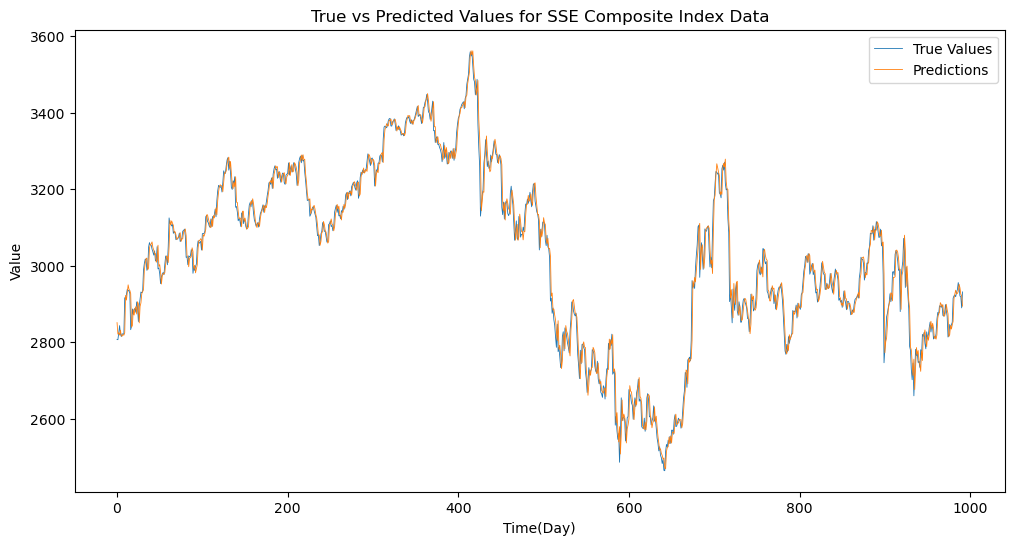

In [6]:
import matplotlib.pyplot as plt

time_axis = np.arange(len(pred))
plt.figure(figsize=(12, 6))

plt.plot(time_axis, true, label='True Values', linewidth=0.6)
plt.plot(time_axis, pred, label='Predictions', linewidth=0.6)

plt.xlabel('Time(Day)')
plt.ylabel('Value')
plt.title('True vs Predicted Values for SSE Composite Index Data')
plt.legend()

plt.show()

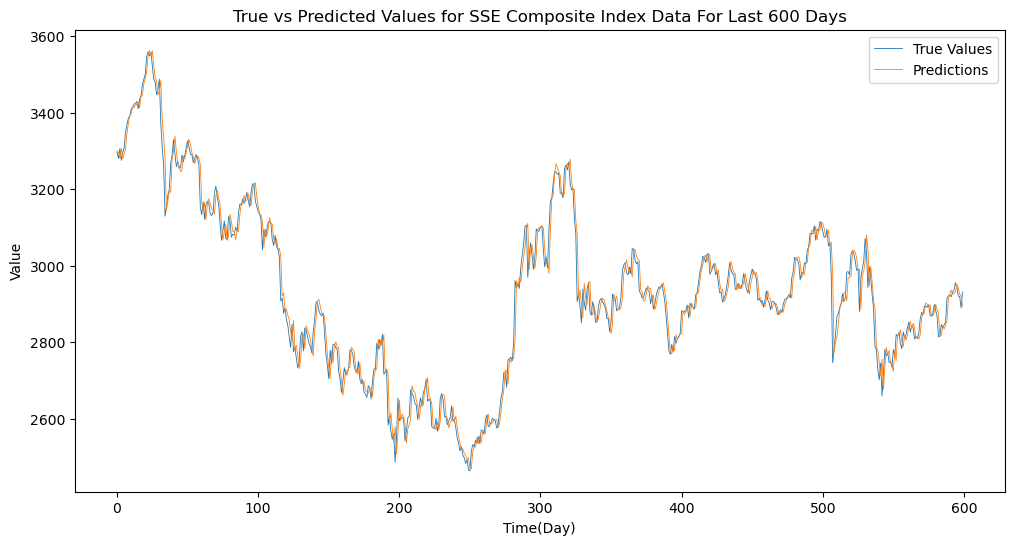

In [7]:
import matplotlib.pyplot as plt

last_value = 600


time_axis = np.arange(len(pred[-last_value:]))
plt.figure(figsize=(12, 6))

plt.plot(time_axis, true[-last_value:], label='True Values', linewidth=0.6)
plt.plot(time_axis, pred[-last_value:], label='Predictions', linewidth=0.6)

plt.xlabel('Time(Day)')
plt.ylabel('Value')
plt.title('True vs Predicted Values for SSE Composite Index Data For Last {} Days'.format(last_value))
plt.legend()

plt.show()